<a href="https://colab.research.google.com/github/vivekpenuli/EDA/blob/master/EDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url='https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/state.csv'

In [ ]:
df=pd.read_csv(url)
df.head(5)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [ ]:
df.Population

0      4779736
1       710231
2      6392017
3      2915918
4     37253956
5      5029196
6      3574097
7       897934
8     18801310
9      9687653
10     1360301
11     1567582
12    12830632
13     6483802
14     3046355
15     2853118
16     4339367
17     4533372
18     1328361
19     5773552
20     6547629
21     9883640
22     5303925
23     2967297
24     5988927
25      989415
26     1826341
27     2700551
28     1316470
29     8791894
30     2059179
31    19378102
32     9535483
33      672591
34    11536504
35     3751351
36     3831074
37    12702379
38     1052567
39     4625364
40      814180
41     6346105
42    25145561
43     2763885
44      625741
45     8001024
46     6724540
47     1852994
48     5686986
49      563626
Name: Population, dtype: int64

In [ ]:
df['Population'].mean()

6162876.3

In [ ]:
print(df['Population'].median())

4436369.5


In [ ]:
from scipy.stats import trim_mean

[link text](https://docs.google.com/drawings/d/1wzlTaj3dhI1naU4suhedP-6sGWE3xgn5mL-KEZuKr5A/edit?usp=sharing)

In [ ]:
print(trim_mean(df['Population'], 0.1))      # it is not sensitive to  outlier like median 

4783697.125


# note : The mean is bigger than the trimmed mean, which is bigger than the median.
because trim mean exclude teh 10 % from each side

weighted mean

Another type of mean is a weighted mean, which you calculate by multiplying each data value xi by a user-specified weight wi and dividing their sum by the sum of the weights. The formula for a weighted mean is:

Weightedmean=x¯w=∑ni=1wixi∑ni=1wi
There are two main motivations for using a weighted mean:

Some values are intrinsically more variable than others, and highly variable observations are given a lower weight. For example, if we are taking the average from multiple sensors and one of the sensors is less accurate, then we might downweight the data from that sensor.

The data collected does not equally represent the different groups that we are interested in measuring. For example, because of the way an online experiment was conducted, we may not have a set of data that accurately reflects all groups in the user base. To correct that, we can give a higher weight to the values from the groups that were underrepresented.

#weighted mean
A special type of categorical data is data in which the categories represent or can be mapped to discrete values on the same scale. A marketer for a new cloud technology, for example, offers two levels of service, one priced at $300/month and another at $50/month. The marketer offers free webinars to generate leads, and the firm figures that 5% of the attendees will sign up for the $300 service, 15% will sign up for the $50 service, and 80% will not sign up for anything. This data can be summed up, for financial purposes, in a single “expected value,” which is a form of weighted mean, in which the weights are probabilities.

The expected value is calculated as follows:

Multiply each outcome by its probability of occurrence.

Sum these values.

In the cloud service example, the expected value of a webinar attendee is thus $22.50 per month, calculated as follows:

EV=(0.05)(300)+(0.15)(50)+(0.80)(0)=22.5
The expected value is really a form of weighted mean: it adds the ideas of future expectations and probability weights, often based on subjective judgment. Expected value is a fundamental concept in business valuation and capital budgeting—for example, the expected value of five years of profits from a new acquisition, or the expected cost savings from new patient management software at a clinic.

In [ ]:
import numpy as np

[link text](https://www.mathsisfun.com/data/weighted-mean.html)

In [ ]:
print(df['Murder.Rate'].mean())          
  # here calculating the murder rate mean do not generaly give 
  #us the mean murder rate because here murder also depend on poplulation

4.066


In [ ]:
print(np.average(df['Murder.Rate'], weights=df['Population']))


4.445833981123393


#variance


In [ ]:
df.head(5)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [ ]:
print(df['Population'].std()) # not a good way to check the variance 
#because standard deviation is effective by outliers


6848235.347401142


# better way

The median absolute deviation (MAD, [1]) computes the median over the absolute deviations from the median. It is a measure of dispersion similar to the standard deviation but more robust to outliers 

In [ ]:
from scipy import stats

[link text](https://www.statisticshowto.com/median-absolute-deviation/)

In [ ]:
stats.median_absolute_deviation(df['Population'])

3849870.3852

In [ ]:
print(abs(df['Population'] - df['Population'].median()).median() / 0.6744897501960817)

3849876.1459979336


Interquartile range is calculated as the difference of the 75% and 25% quantile.

In [ ]:
print(df['Population'].quantile(0.75) - df['Population'].quantile(0.25))


4847308.0


#Percentiles and Boxplots
Pandas has the quantile method for data frames.

In [ ]:
print(df['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


In [ ]:
print(df['Population'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))
# 0.5 is also called mean of the dataset

0.05      689529.00
0.25     1833004.25
0.50     4436369.50
0.75     6680312.25
0.95    19118545.60
Name: Population, dtype: float64


In [ ]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(df['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())   # better way to do find qantile

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


visualization of qunatile ,median etc:

In [ ]:
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


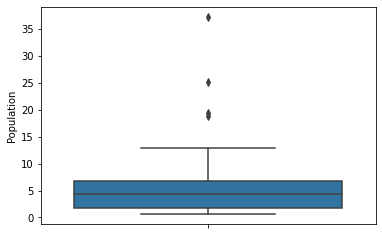

In [ ]:
ax = sns.boxplot(x=df['Population']/1000000,orient='v')

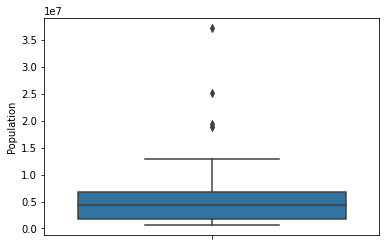

In [ ]:
ax = sns.boxplot(x=df["Population"],orient='v')

In [ ]:
print(df['Population'].head(5))   #here each state have different population in number
# some can have large population some can have low population

0     4779736
1      710231
2     6392017
3     2915918
4    37253956
Name: Population, dtype: int64


In [ ]:
print( (df['Population']/1000000).head(5)) # here now each state have population divided in million 

0     4.779736
1     0.710231
2     6.392017
3     2.915918
4    37.253956
Name: Population, dtype: float64


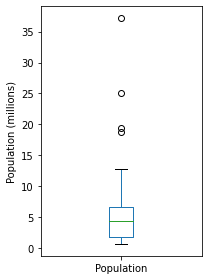

In [ ]:
import matplotlib.pyplot as plt

ax = (df['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

 # Histograms
 when dealing with graph in population try to make population in million
 beacuse it help us to sumarise the graph more preciously 

In [ ]:
binnedPopulation = pd.cut(df['Population'],bins=10)
print(binnedPopulation.value_counts())

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64


[link text](https://matplotlib.org/3.2.1/tutorials/intermediate/tight_layout_guide.html)

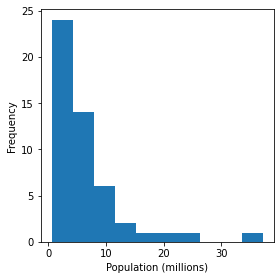

In [ ]:
# this is the actual graph of above table
ax = (df['Population']/1000000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()  # use of tight_layout in comment
plt.show()

In [ ]:
may = pd.cut(df['Population']/1000000,bins=[0,5,10,15,20,25,30,35,40,45,50])
print(may.value_counts())

(0, 5]      28
(5, 10]     15
(10, 15]     3
(15, 20]     2
(35, 40]     1
(25, 30]     1
(45, 50]     0
(40, 45]     0
(30, 35]     0
(20, 25]     0
Name: Population, dtype: int64


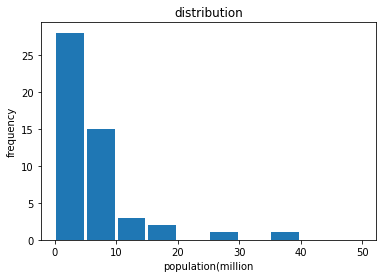

In [ ]:
bins=[0,5,10,15,20,25,30,35,40,45,50]  # here these are the frequency intervals we are intrested in .
# here the minimum frequency is 0 therfore bins should contrain 0 
plt.title("distribution")
plt.xlabel('population(million')
plt.ylabel("frequency")
plt.hist(df['Population']/1000000,rwidth=0.9,bins=bins)
plt.show()

#Density Estimates

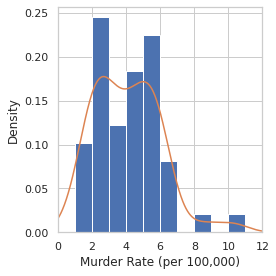

In [ ]:
ax = df['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
df['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()

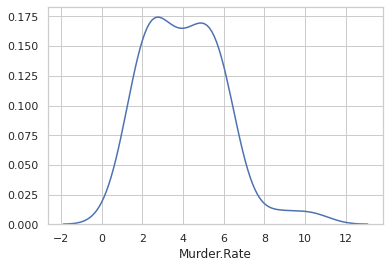

In [ ]:
sns.distplot(df['Murder.Rate'],hist=False)


#Exploring Binary and Categorical Data

In [ ]:
url1='https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/dfw_airline.csv'
plane=pd.read_csv(url1)
plane

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


In [ ]:
print(100 * plane / plane.values.sum()) # finding percentage of each columns

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


In [ ]:
plane.transpose()

,0
Carrier,64263.16
ATC,84856.50
Weather,11235.42
Security,343.15
Inbound,118427.82


Note that a bar chart resembles a histogram; in a bar chart the x-axis represents different categories of a factor variable, while in a histogram the x-axis represents values of a single variable on a numeric scale. In a histogram, the bars are typically shown touching each other, with gaps indicating values that did not occur in the data. In a bar chart, the bars are shown separate from one another.

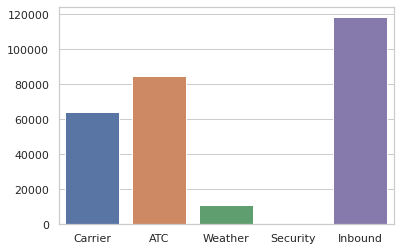

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(data=plane)

# correlation 
this topic is not completed 



#Exploring Two or More Variables
Familiar estimators like mean and variance look at variables one at a time (univariate analysis). Correlation analysis (see “Correlation”) is an important method that compares two variables (bivariate analysis). In this section we look at additional estimates and plots, and at more than two variables (multivariate analysis).

In [ ]:
url2='https://raw.githubusercontent.com/vivekpenuli/statistics/master/kc_tax.csv'
tax=pd.read_csv(url2)
tax.head(5)

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [ ]:
tax1 = tax.loc[(tax.TaxAssessedValue < 750000) & 
                     (tax.SqFtTotLiving > 100) &
                     (tax.SqFtTotLiving < 3500), :]
print(tax1.shape)

(432693, 3)


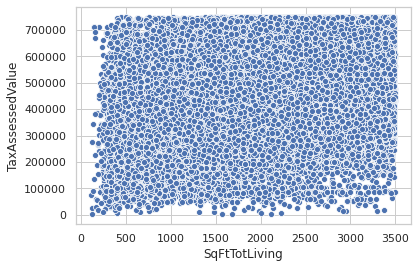

In [ ]:
ax = sns.scatterplot(x='SqFtTotLiving', y='TaxAssessedValue', data=tax1)

Text(0, 0.5, 'TaxAssessedValue')

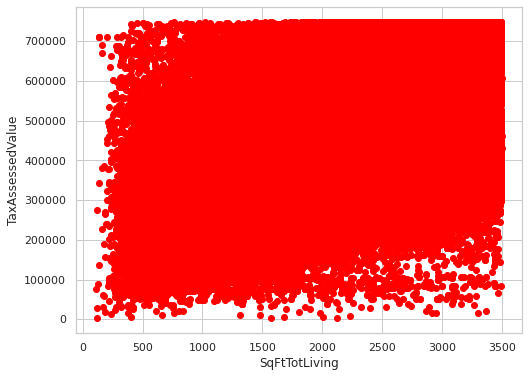

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(tax1['SqFtTotLiving'],tax1['TaxAssessedValue'],c='red',marker='o')
plt.xlabel('SqFtTotLiving')
plt.ylabel('TaxAssessedValue')

#Hexagonal binning and Contours
Plotting numeric versus numeric data
here plotting scatter plot is good for small dataset but for larger dataset it became more complex.
so we will use hexagonal binning 

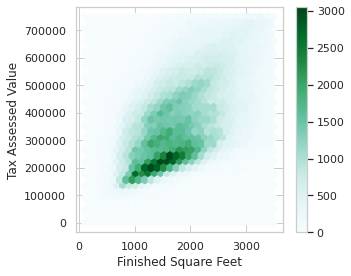

In [ ]:
ax = tax1.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

here from the graph we can easly see that between 1000000-2000000 there is more TaxAssessedValue values 